From A Method for Mixed Integer Programming Problems by Particle Swarm Optimization by Kitayama

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import PyCEGO

true minimum is -6.33333333333


<IPython.core.display.Javascript object>


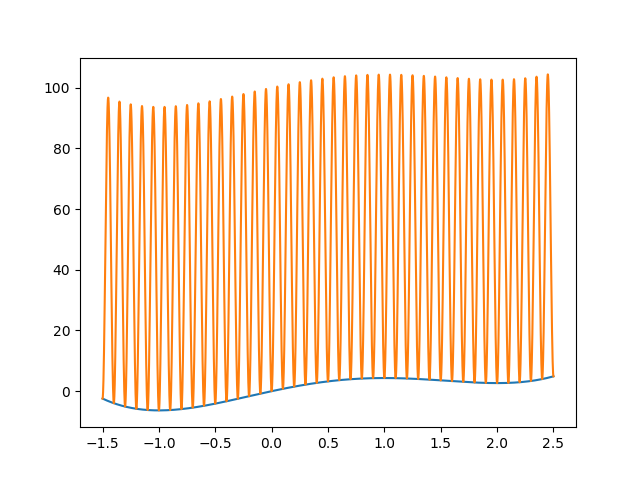

In [2]:
increment = 0.1
allowable = np.arange(-3,4,increment)
assert(np.all(allowable[:-1] <= allowable[1:]))
#assert(( 0.1 < allowable ).nonzero()[0][0]  == 4)

def penalty_function(x):
    o = np.zeros_like(x)
    for ix, _x in enumerate(x):
        iR = ( _x < allowable ).nonzero()[0][0]
        L,R = allowable[iR-1],allowable[iR]
        x01 = (_x-L)/(R-L)
        o[ix] = 100*0.5*(1-np.cos(2*np.pi*x01))
    return o

x = np.linspace(-1.5, 2.5, 5000)
f = x**4 - 8/3*x**3 - 2*x**2 + 8*x
penalty = penalty_function(x)
dfdx = [4,-8,-4,8] # in decreasing order
def ff(x):
    return x**4 - 8/3*x**3 - 2*x**2 + 8*x
print("true minimum is", np.min(ff(np.roots(dfdx))))
plt.plot(x,f)
plt.plot(x,f+penalty)
plt.show()

In [3]:
def obj(x):
    return  x**4 - 8/3*x**3 - 2*x**2+8*x + penalty_function(x)
bounds = [(-3,3)]
import scipy.optimize
res = scipy.optimize.differential_evolution(obj, bounds, popsize = 50, 
    mutation = (0.5,1),
    recombination = 0.9,
    disp = False,
    strategy = 'rand1bin', 
    atol = 0, tol = 0,
    maxiter = 100)
print(res)

     fun: -6.3333333333333339
 message: 'Optimization terminated successfully.'
    nfev: 3924
     nit: 77
 success: True
       x: array([-1.])


In [4]:
D = 1
CEGO_bounds = [PyCEGO.Bound(-3.0,3.0)]

def CEGO_obj(x):
    return obj(np.array([x[0].as_double()]))[0]

for ocounter in range(5):
    layers = PyCEGO.NumberishLayers(CEGO_obj, D, D*50, 1, 3)    
    layers.set_bounds(CEGO_bounds)
    layers.set_builtin_evolver(PyCEGO.BuiltinEvolvers.differential_evolution)

    objs = []
    for counter in range(1000):
        layers.do_generation()
        objective, coeffs = layers.get_best()
        if counter % 50 == 0:
            print(layers.print_diagnostics())
        objs.append(objective)

    print('CEGO', objs[-1])

i: 0 best: -3.49741 c: -1.402104,  queue: 0
i: 50 best: -6.30623 c: -1.000524,  queue: 0
i: 100 best: -6.33333 c: -1.000000,  queue: 0
i: 150 best: -6.33333 c: -1.000000,  queue: 0
i: 200 best: -6.33333 c: -1.000000,  queue: 0
i: 250 best: -6.33333 c: -1.000000,  queue: 0
i: 300 best: -6.33333 c: -1.000000,  queue: 0
i: 350 best: -6.33333 c: -1.000000,  queue: 0
i: 400 best: -6.33333 c: -1.000000,  queue: 0
i: 450 best: -6.33333 c: -1.000000,  queue: 0
i: 500 best: -6.33333 c: -1.000000,  queue: 0
i: 550 best: -6.33333 c: -1.000000,  queue: 0
i: 600 best: -6.33333 c: -1.000000,  queue: 0
i: 650 best: -6.33333 c: -1.000000,  queue: 0
i: 700 best: -6.33333 c: -1.000000,  queue: 0
i: 750 best: -6.33333 c: -1.000000,  queue: 0
i: 800 best: -6.33333 c: -1.000000,  queue: 0
i: 850 best: -6.33333 c: -1.000000,  queue: 0
i: 900 best: -6.33333 c: -1.000000,  queue: 0
i: 950 best: -6.33333 c: -1.000000,  queue: 0
CEGO -6.333333333333334
i: 0 best: -5.80544 c: -0.801025,  queue: 0
i: 50 best: -6.